In [69]:
# Import relevant libraries
import requests
import json
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import random


#from config import api_key

In [74]:
# Read in data from CSV to DataFrame
path = "../NY-House-Dataset.csv"
housing_df = pd.read_csv(path)

In [75]:
# Clean up data
#housing_df = housing_df.drop(labels=["MAIN_ADDRESS","ADMINISTRATIVE_AREA_LEVEL_2","LOCALITY","SUBLOCALITY","STREET_NAME","LONG_NAME"], axis = 1)
#housing_df.head()
# Clean up data
def checknumeric(txt):
    return txt.isnumeric()
#wrong_df = housing_df.loc[housing_df["ADMINISTRATIVE_AREA_LEVEL_2"].apply(checknumeric)]
wrong_df = housing_df.loc[(housing_df["ADMINISTRATIVE_AREA_LEVEL_2"].apply(checknumeric)) | (housing_df["PRICE"] > 5000000)]
remove = wrong_df.index
housing_df = housing_df.drop(labels=remove)
housing_df = housing_df.drop(labels=["MAIN_ADDRESS","ADMINISTRATIVE_AREA_LEVEL_2","STREET_NAME","LONG_NAME", "FORMATTED_ADDRESS"], axis = 1)
housing_df.reset_index()
housing_df.head(40)


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022",New York,Manhattan,40.761255,-73.974483
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238",New York,Kings County,40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027",New York County,New York,40.809448,-73.946777
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473",The Bronx,East Bronx,40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230",Kings County,Brooklyn,40.615738,-73.969694
10,Brokered by Engel & Volkers Americas,Co-op for sale,375000,2,1.000000,850.000000,800 Grand Concourse Apt 2JS,"Bronx, NY 10451",Bronx County,The Bronx,40.824870,-73.922983
11,Brokered by Re/Max Edge,Townhouse for sale,689000,3,2.373861,1162.000000,456 Van Name Ave,"Staten Island, NY 10303",New York,Richmond County,40.624996,-74.155306
12,Brokered by COMPASS,Co-op for sale,259000,3,1.000000,2184.207862,34-41 85th St Unit 1D,"Jackson Heights, NY 11372",Queens County,Queens,40.753119,-73.881876


In [39]:
def plot_lin_regress(x,y,xlabel,ylabel,title,loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,loc,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    file_name = title.replace(" ","_")
    plt.savefig("output/"+file_name)
    return rvalue

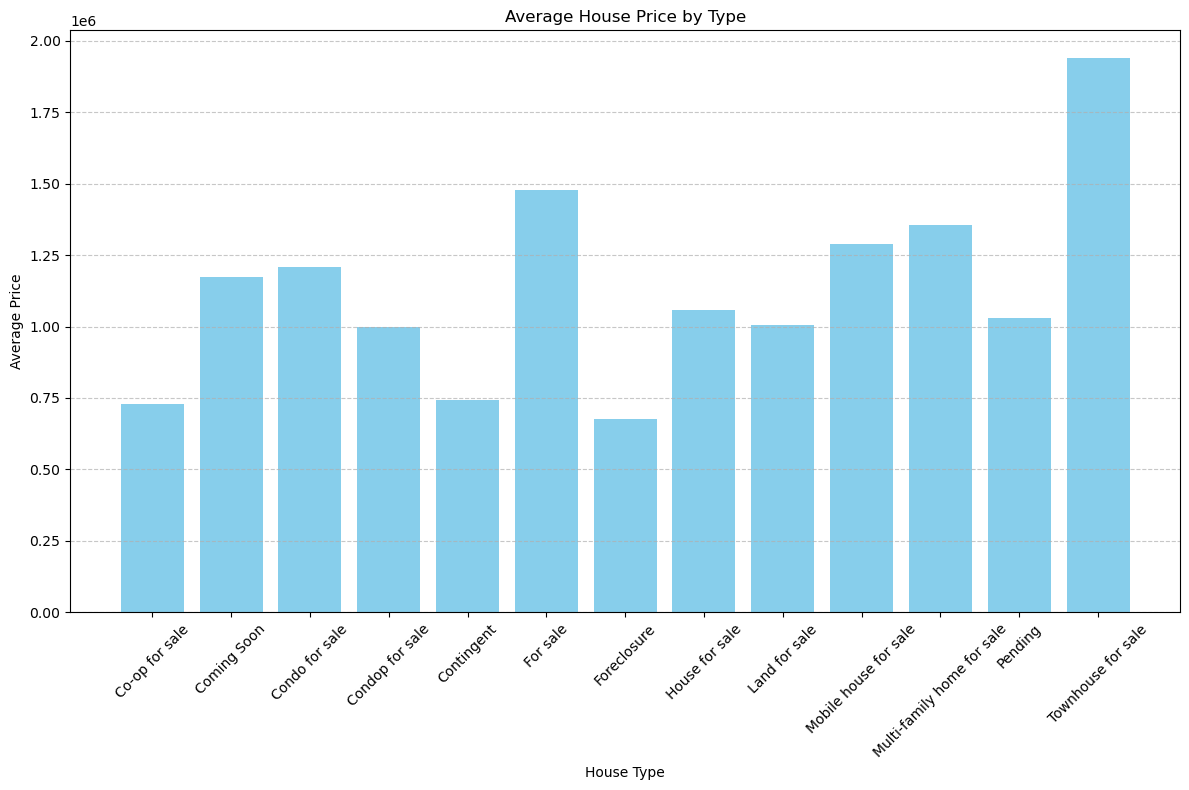

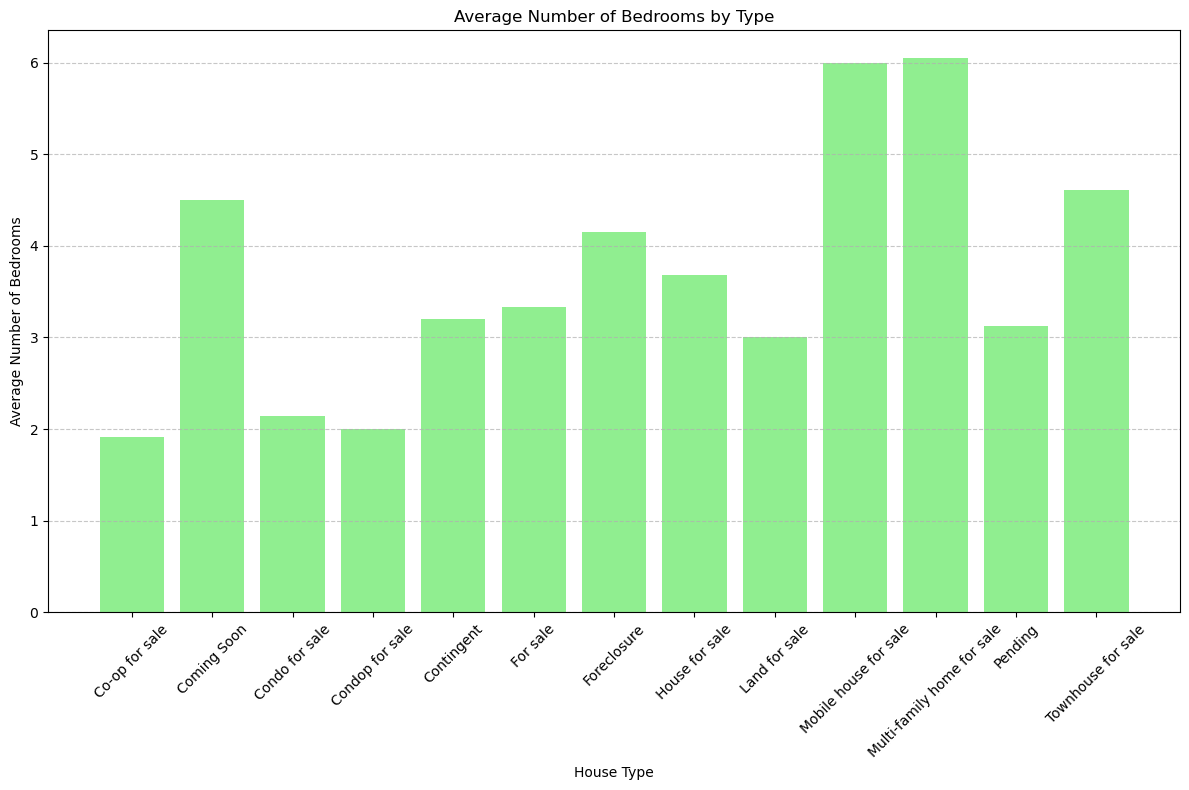

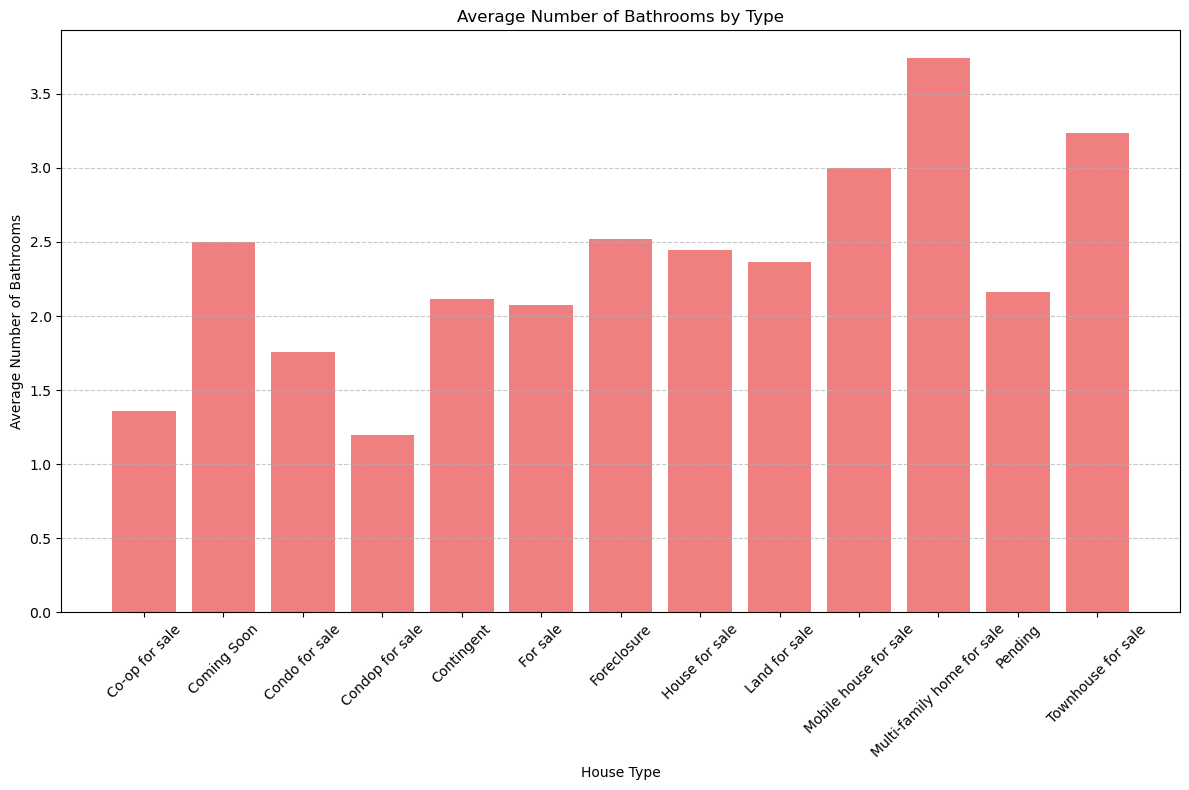

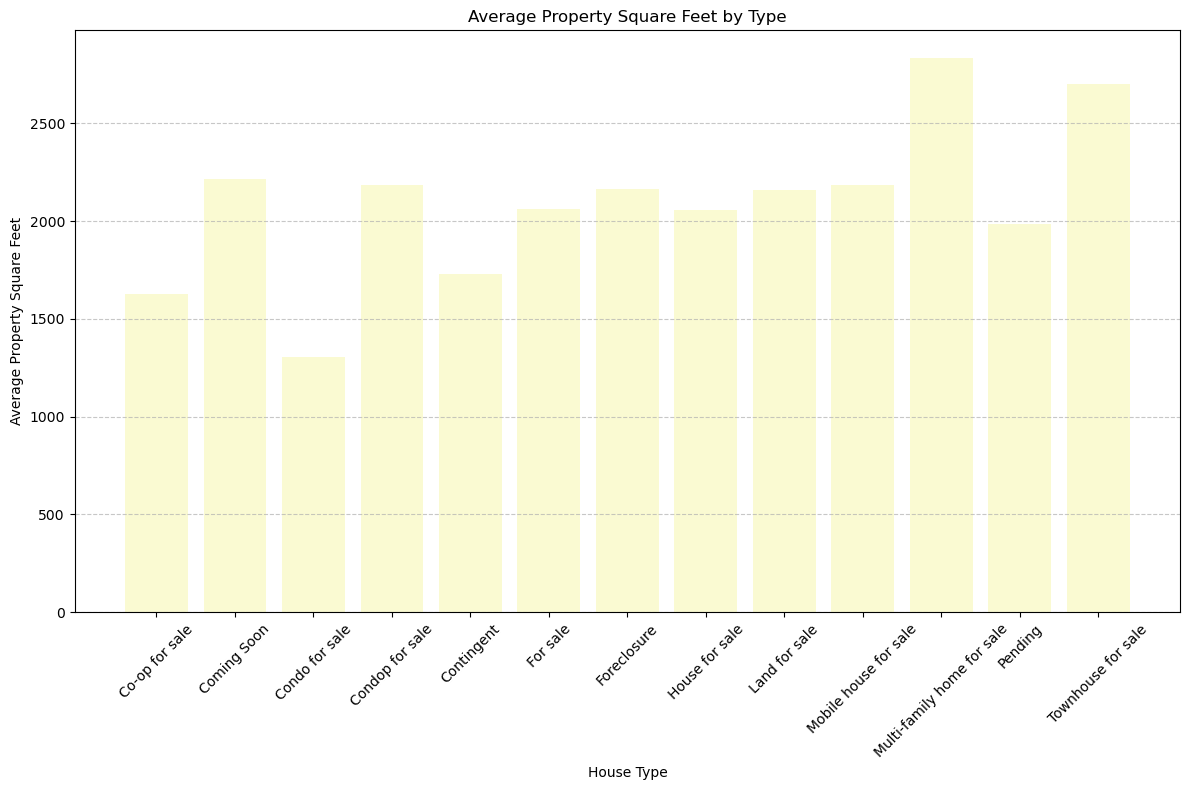

In [76]:
# General housing graphs
data = pd.DataFrame(housing_df)
aggregation = data.groupby('TYPE').agg({
    'BEDS': 'mean',
    'BATH': 'mean',
    'PRICE': 'mean',
    'PROPERTYSQFT': 'mean'
}).reset_index()

# Bar graphs of housing prices, rooms, etc.
# Plot 1: Average Price by House Type
plt.figure(figsize=(12, 8))
plt.bar(aggregation['TYPE'], aggregation['PRICE'], color='skyblue')
plt.title('Average House Price by Type')
plt.xlabel('House Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

# Plot 2: Average Number of Bedrooms by House Type
plt.figure(figsize=(12, 8))
plt.bar(aggregation['TYPE'], aggregation['BEDS'], color='lightgreen')
plt.title('Average Number of Bedrooms by Type')
plt.xlabel('House Type')
plt.ylabel('Average Number of Bedrooms')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

# Plot 3: Average Number of Bathrooms by House Type
plt.figure(figsize=(12, 8))
plt.bar(aggregation['TYPE'], aggregation['BATH'], color='lightcoral')
plt.title('Average Number of Bathrooms by Type')
plt.xlabel('House Type')
plt.ylabel('Average Number of Bathrooms')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

# Plot 4: Average Property Square Feet by House Type
plt.figure(figsize=(12, 8))
plt.bar(aggregation['TYPE'], aggregation['PROPERTYSQFT'], color='lightgoldenrodyellow')
plt.title('Average Property Square Feet by Type')
plt.xlabel('House Type')
plt.ylabel('Average Property Square Feet')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()

In [21]:
# Pie chart of house types

In [22]:
# Scatter plot comparing price to square footage



#include linear regression

In [23]:
# Geoapify graphs 

# Map of co-ops(?)

In [24]:
#Map of houses

In [25]:
#Map of nearby services (color code?)

In [41]:
# Gather data for distance to school vs price

# Set the parameters for the type of search
limit = 20
radius = 1000
category= "education.school"

# set up a parameters dictionary
params = {
    "limit":limit,
    "apiKey":api_key,  
    "categories":category
}

# Set base URL
base_url = "https://api.geoapify.com/v2/places"

# get sample (change to 100 later)
num_samples = 100
sample_indexes = random.sample(range(0,len(housing_df)),num_samples) 

prices = []
distances = []

print("Getting data. May take a few minutes")

current_count = 1

for index in sample_indexes:
    print(f"Getting nearest school to sample {current_count} of {num_samples}.")
    current_count += 1
    # Set the geographical coordinates
    latitude = housing_df.loc[index, "LATITUDE"]
    longitude = housing_df.loc[index, "LONGITUDE"]

    filters = f"circle:{longitude},{latitude},{radius}"
    bias = f"proximity:{longitude},{latitude}"

    params["filters"] = filters
    params["bias"] = bias
    nearby_school = requests.get(base_url, params=params)
    nearby_school = nearby_school.json()

    prices.append(housing_df.loc[index, "PRICE"])
    distances.append(nearby_school["features"][0]["properties"]["distance"])

distance_df = pd.DataFrame({"Price (Dollar)": prices, "Distance to Nearest School (Meters)":distances})
print("Finished getting data.")

Getting data. May take a few minutes
Getting nearest school to sample 1 of 100.
Getting nearest school to sample 2 of 100.
Getting nearest school to sample 3 of 100.
Getting nearest school to sample 4 of 100.
Getting nearest school to sample 5 of 100.
Getting nearest school to sample 6 of 100.
Getting nearest school to sample 7 of 100.
Getting nearest school to sample 8 of 100.
Getting nearest school to sample 9 of 100.
Getting nearest school to sample 10 of 100.
Getting nearest school to sample 11 of 100.
Getting nearest school to sample 12 of 100.
Getting nearest school to sample 13 of 100.
Getting nearest school to sample 14 of 100.
Getting nearest school to sample 15 of 100.
Getting nearest school to sample 16 of 100.
Getting nearest school to sample 17 of 100.
Getting nearest school to sample 18 of 100.
Getting nearest school to sample 19 of 100.
Getting nearest school to sample 20 of 100.
Getting nearest school to sample 21 of 100.
Getting nearest school to sample 22 of 100.
Gett

R-Squared equals: 0.03044812734711744


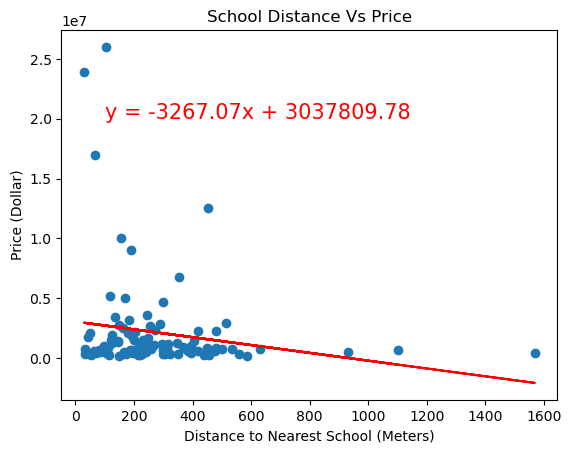

In [42]:
#Scatter plot of data 
rvalue = plot_lin_regress(distance_df["Distance to Nearest School (Meters)"],distance_df["Price (Dollar)"],
                 "Distance to Nearest School (Meters)","Price (Dollar)","School Distance Vs Price",(100,20000000))
print(F"R-Squared equals: {rvalue**2}")
plt.show()

In [39]:
# Analysis Text

In [ ]:
# References